In [1]:
import numpy as np

from SubsidieModel import SubsidieModel

model1 = SubsidieModel()

/Users/michielvanhouten/Dropbox/Mac/Documents/GitHub/abm/.venv/lib/python3.9/site-packages/mesa/time.py:82: FutureWarning: The AgentSet is experimental. It may be changed or removed in any and all future releases, including patch releases.
We would love to hear what you think about this new feature. If you have any thoughts, share them with us here: https://github.com/projectmesa/mesa/discussions/1919
  self._agents: AgentSet = AgentSet(agents, model)


In [2]:
x, y = 0, 0 # Example position, you can change it to any position
agent_at_position = model1.grid.get_cell_list_contents((x, y))
if agent_at_position:
    print("Agent Type at position (", x, ",", y, "):", agent_at_position[0].agent_type)
else:
    print("No agent at position (", x, ",", y, ")")

Agent Type at position ( 0 , 0 ): TypeAdopter.LAGGARDS


In [3]:
for x in range(50):
    for y in range(50):
        if model1.grid.is_cell_empty((x, y)):
            print("Cel op positie (", x, ",", y, ") is leeg.")

In [4]:
from SubsidieModel import count_type, TypeAdopter


a = count_type(model1, TypeAdopter.INNOVATOR)
print(a)
b = count_type(model1, TypeAdopter.EARLY_ADOPTER)
print(b)
c = count_type(model1, TypeAdopter.EARLY_MAJORITY)
print(c)
d = count_type(model1, TypeAdopter.LATE_MAJORITY)
print(d)
e = count_type(model1, TypeAdopter.LAGGARDS)
print(e)

total = a+b+c+d+e
print(total)

63
338
847
851
401
2500


In [5]:
# Voer het model uit voor een bepaald aantal stappen
for i in range(100):
    model1.step()

# Haal de gegevens op van de datacollector
model_data = model1.datacollector.get_model_vars_dataframe()

# Toon de gegevens
print(model_data)


    Gemiddelde belangstelling  Aantal gekochte EV  Aantal gekochte FBA  \
0                    0.460852                 353                   93   
1                    0.453975                 536                  129   
2                    0.455587                 633                  147   
3                    0.458767                 691                  153   
4                    0.462710                 728                  164   
..                        ...                 ...                  ...   
95                   0.807413                1967                  525   
96                   0.811377                1969                  527   
97                   0.815340                1972                  528   
98                   0.819405                1974                  528   
99                   0.823572                1974                  530   

    Percentage huishoudens in bezit auto  
0                                 0.7400  
1                        

In [6]:
agent_data = model1.datacollector.get_agent_vars_dataframe()

print(agent_data)

                   Type Agent  Belangstelling  leeftijd auto
Step AgentID                                                
1    (38, 36)   LATE_MAJORITY        0.662500             99
     (9, 3)     EARLY_ADOPTER        0.658333             74
     (46, 8)    LATE_MAJORITY        0.591667             82
     (20, 7)         LAGGARDS        0.204167              1
     (13, 27)   EARLY_ADOPTER        0.354167              1
...                       ...             ...            ...
100  (4, 34)    EARLY_ADOPTER        0.766667            100
     (21, 5)    LATE_MAJORITY        1.075000            198
     (17, 23)   EARLY_ADOPTER        0.766667            100
     (26, 33)   LATE_MAJORITY        0.408333             38
     (46, 14)  EARLY_MAJORITY        1.154167            205

[250000 rows x 3 columns]


In [7]:

import holoviews as hv
from collections import defaultdict

hv.extension('bokeh')

for i in range(10):
    model1.step()

model_data = model1.datacollector.get_model_vars_dataframe()

print(model_data)





def value(cell):
    if cell.belangstelling  < 0.8: return 15  
    elif cell.belangstelling > 0.8 and cell.belangstelling < 0.9: return 20
    elif cell.belangstelling > 0.9 : return 5

hmap = hv.HoloMap()  # draws the holoviews grid

for i in range(100):   
    model1.step()   # This will run the model for one step. Because of the for loop, the model will run for 100 steps in total!!!!!
    # Note: It is not a big problem if you don't completely understand the next few lines since these concern the holoviews library
    grid_dict = defaultdict(list)
    for content, row_index, col_index in model1.grid.coord_iter():
        grid_dict[row_index] += [content]  
    data = np.array([[value(c) for c in row] for row in grid_dict.values()])
    data = np.transpose(data)
    data = np.flip(data, axis=0)
    bounds=(0,0,5,5)   # Coordinate system: (left, bottom, right, top)
    hmap[i] = hv.Image(data, vdims=[hv.Dimension('a', range=(0,21))],bounds=bounds).relabel('Grid').opts(cmap='Viridis',xticks=[0],yticks=[0])
    # holoviews comes with different colormaps (cmap). In this case, we are using the colormap Viridis, which has a color scheme between blue and yellow.
hmap




ModuleNotFoundError: No module named 'holoviews'

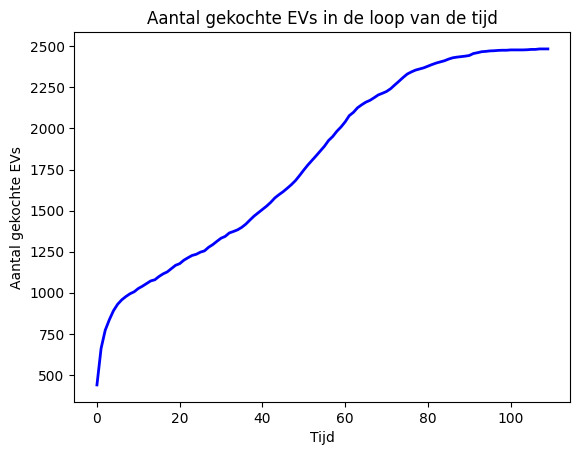

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming model_data is defined somewhere earlier in your code
# Haal het aantal gekochte EV's uit de modelgegevens
aantal_gekochte_evs = model_data['Aantal gekochte EV'].tolist()

y = aantal_gekochte_evs
# Maak een array voor de tijd (stappen)
x = np.arange(len(aantal_gekochte_evs))

# Plot
fig, ax = plt.subplots()

# Plot het aantal gekochte EV's in de loop van de tijd
ax.plot(x, aantal_gekochte_evs, linewidth=2.0, color='blue')  # Use x as time steps

ax.set_xlabel('Tijd')
ax.set_ylabel('Aantal gekochte EVs')
ax.set_title('Aantal gekochte EVs in de loop van de tijd')

plt.show()
